In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import time
import sys
import copy
#Quick fudge to make import from ../Scripts work
import sys
sys.path.append('/Users/floorbroekgaarden/Projects/BHNS_project/Scripts')
import string

# import ClassCosmicIntegrator  as CI #Given settings and redshifts returns rates (2D arrays) Loads the data
# import coencodeVarious        as CV


# some often used post-processing functions. 
from PostProcessingScripts import * 
import PostProcessingScripts as PP  

import pandas as pd


from astropy import units as u
from astropy import constants as const



from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


%matplotlib inline
import pesummary
from pesummary.io import read
print(pesummary.__version__)
import h5py
# %config InlineBackend.figure_format = 'retina'



0.9.1


* [BHNS quantile figure](#BHNS-figure)
* [BHBH quantile figure](#BHBH-figure)
* [NSNS quantile figure](#NSNS-figure)

## Run this to fix old labeling to new labeling MSSFR models:

In [2]:



MSSFRnameslistWantedOrder = []
MSSFRnameslistWantedOrder.append('000') # add phenomenological 

for ind_GSMF, GSMF in enumerate([0,1,2]):
    ind_x = ind_GSMF + 1
    for ind_MZ, MZ in enumerate([0,1,2]):
        ind_y = ind_MZ +1
        for ind_SFR, SFR in enumerate([0,1,2]):
            ind_z = ind_SFR+1
            
            
            
            
        

            MSSFRnameslistWantedOrder.append('%s%s%s'%(ind_x, ind_y, ind_z))
            
        


indexlist = np.asarray(range(28))

indexOrderedToOldMSSFR = []
for mssfr in MSSFRnameslistWantedOrder:
    mask = (np.asarray(MSSFRnameslist)==mssfr)
    ind_map = indexlist[mask]
    indexOrderedToOldMSSFR.append(int(ind_map[...].squeeze()))
    
    



dictOldmssfrINDtoNEWmssfrIND = {MSSFRnameslist[i]: indexOrderedToOldMSSFR[i] for i in range(len(MSSFRnameslist))}



print(dictOldmssfrINDtoNEWmssfrIND['321'])

8


In [25]:
def plotConfidenceIntervals(DCOtype='BHNS', BPSnameslist=['A'], xvarind=0, axe=None, ylim=[0,1], xlabel='xlabel', \
                            ylabel='ylabel', pathQuantiles='/Users/floorbroekgaarden/Projects/BHNS_project/PlottingScripts/9_PredictedDistributions_BPS_and_MSSFR_variations/csvFilesConfidenceIntervals/'):
    """  
    options:
    
    DCOtype:      'BHNS' ,'BHBH' or 'NSNS', which type of Double compact object to plot  (str)
    BPSnameslist: list of alphabetical letters. The function will plot the models given in the list 
                    [no guarentee that not chosing the default 15 models will give a good layout] (list)
                    xvarind: index of the variable in the list to plot, options are: ['Mass1', 'Mass2', 'tc',\
                    'log10(tc)', 'TotMass', 'ChirpMass', 'q', Z, log(Z)] (so the index between 0 and 8) if you want
                    to add your own parameter you need to add this to the ConfidenceIntervals_model (..) .csv files (int)
    axe:           the axe on which to plot this parameter (axes object)
    ylim:          list of ymin and ymax values for the ylims (list)
    xlabel:        name of the xlabel (str) 
    ylabel:        name of the ylabel (str)
    pathQuantiles: path to the csv files that contain the distribution quantiles (str) 
     
    """
    
    
#     BPScolors       = sns.hls_palette(len(BPSnameslist), l=.46) #  sns.color_palette("huls", (len(BPSnameslist)))
    BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    #     BPScolors =  = [cm(x) for x in np.linspace(0,1 , (len(BPSnameslist)))] 
    
#     BPScolors = ['crimson', 'purple', 'mediumblue', 'deepskyblue', 'teal', 'yellowgreen', 'gold', 'darkorange', 'orangered', 'red']
    markerstyles = ['+', 'x', 'o', 'x', '+']
    quantileStrings = ['0.005', '0.05', '0.16', '0.25', '0.5', '0.75', '0.84', '0.95', '0.995']
 
    minq0_005= 100
    minq0_05 = 100
    minq0_25 =100
    maxq0_75 = -10
    maxq0_95 = -10
    maxq0_995= -10 
    

    
    
    xright =1+0.05
    xxx = (len(BPSnameslist)+xright)-1
    for ind_m, BPSmodelName in enumerate(BPSnameslist):
        dfname = pathQuantiles + 'ConfidenceIntervals_model_' + BPSmodelName + '_' + DCOtype + '.csv'
#         print('now at BPS model name =', BPSmodelName)
        df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])

            
        ind_max = len(MSSFRnameslist) + xvarind*len(MSSFRnameslist)
        ind_min = xvarind*len(MSSFRnameslist)
        
        dx = 0.4 #0.3
        dxrange = np.linspace(-dx, +dx, len(MSSFRnameslist)+1) + ind_m
        dxlen = (2*dx)/len(MSSFRnameslist)
        for ind_mssfr, MSSFRname in enumerate(MSSFRnameslist):
        
            q0_005= (df.iloc[0][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr] #
            q0_05 = (df.iloc[1][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]
            q0_25 = (df.iloc[3][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]
            q0_5 = (df.iloc[4][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]
            q0_75 = (df.iloc[5][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]
            q0_95 = (df.iloc[7][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]
            q0_995=(df.iloc[8][ind_min:ind_max])[dictOldmssfrINDtoNEWmssfrIND[MSSFRname]]#[ind_mssfr]

            
            if xvarind ==7:
                # we want actually the log(Z) values:
                Zsolar = 0.0142 # solor metallicity
                q0_005, q0_05, q0_25, q0_5, q0_75, q0_95, q0_995 =\
                tfZ(q0_005), tfZ(q0_05), tfZ(q0_25), tfZ(q0_5), tfZ(q0_75), tfZ(q0_95), tfZ(q0_995)
                
#                 minq0_005, minq0_05, minq0_25, maxq0_75, maxq0_95, maxq0_995 = \
#                 tfZ(minq0_005), tfZ(minq0_05), tfZ(minq0_25), tfZ(maxq0_75), tfZ(maxq0_95), tfZ(maxq0_995)            
            
        
            minq0_005 = np.min([minq0_005, q0_005])
            minq0_05 = np.min([minq0_05, q0_05])
            minq0_25 = np.min([minq0_25, q0_25])
            
            maxq0_75 = np.max([maxq0_75, q0_75])
            maxq0_95 = np.max([maxq0_95, q0_95])
            maxq0_995 = np.max([maxq0_995, q0_995])
            
            

            
            for ind_q, interval in enumerate(['99percent', '90percent', '50percent', 'median']):
                
                xx = dxrange[ind_mssfr]
                
                if interval=='median':
                    if (ind_m==0) & (ind_mssfr==0):
                        axe.scatter(xx, q0_5, \
                                c=BPScolors[ind_m], s=80, label=None, \
                                marker='*', zorder=300, edgecolor='black')                        
                        
                    axe.scatter(xx, q0_5, \
                                c=BPScolors[ind_m], s=20, label=None, \
                                marker='.', zorder=200)        
                else:
                
                    if interval =='99percent':
                        zorder = 102
                        yy = [q0_005, q0_995]
                        alpha = 0.15
                    elif interval=='90percent':
                        zorder = 105
                        yy = [q0_05, q0_95]
                        alpha = 0.25    
                    elif interval=='50percent':
                        zorder = 110
                        yy = [q0_25, q0_75]
                        alpha = 0.4                         
                        
                    axe.bar(xx, height=(yy[1]-yy[0]), bottom=yy[0], color='white', alpha=1, \
                           width=dxlen, zorder=zorder-1)
                    axe.bar(xx, height=(yy[1]-yy[0]), bottom=yy[0], color=BPScolors[ind_m], alpha=alpha, \
                           width=dxlen, zorder=zorder)
############        
        
        # draw names just above one of the bar plots 
#         if (ind_m==0) & (xvarind==0):
#             # if we are at fiducial model
#             fontsize=6
#             for ind_mssfr, mssfrName in enumerate(MSSFRnameslist):
#                 xx = dxrange[ind_mssfr]
#                 dy = (ylim[1]-ylim[0])* (1/12.)
#                 yy = maxq0_995 + (ind_mssfr%3)*dy 
#                 axe.text(xx, yy, s=mssfrName, fontsize=fontsize, color='k',\
#                                      ha='center', va='bottom', weight='bold', alpha=1, rotation=90 )
                
#                 axe.plot([xx,xx], [yy], dx=0, dy=, color=BPScolors[ind_m],\
#                            alpha=0.4)        
         
    
            # DRAW ARROWS 
#         if (ind_m ==(len(BPSnameslist)-1)) & (xvarind==0):
#             # we will plot some text for last value:
#             fontsize = fs-10
#             xxb= xx+dxlen*3
#             dxx = dxlen*8
#             textt = 'median' 
#             axe.text(xxb, q0_5, s=textt, fontsize=fontsize, color=BPScolors[ind_m],\
#                      ha='left', va='center', weight='bold' , zorder=10)
            
            
#             textt = ' 50'  +'\% '+ r'$ \, $  '  
#             yloc = (q0_75-q0_25)*0.75 + q0_25
#             axe.arrow(xxb+dxx+(2*dxlen), yloc, dx=-dxx, dy=0, color=BPScolors[ind_m],\
#                       head_width=0.2,head_length=0.05, alpha=0.8, zorder=10)
#             axe.text(xxb+dxx+4*dxlen, yloc, s=textt, fontsize=fontsize, color=BPScolors[ind_m],\
#                      ha='left', va='center', weight='bold', alpha=1, zorder=10 )            
            
            
#             textt = ' 90'  +'\% '+ r'$ \, $  '  
#             yloc = (q0_95-q0_05)*0.75 + q0_05
#             axe.arrow(xxb+dxx+(2*dxlen), yloc, dx=-dxx, dy=0, color=BPScolors[ind_m],\
#                       head_width=0.2,head_length=0.05, alpha=0.5, zorder=10)
#             axe.text(xxb+dxx+4*dxlen, yloc, s=textt, fontsize=fontsize, color=BPScolors[ind_m],\
#                      ha='left', va='center', weight='bold', alpha=1, zorder=10 )
            
#             textt = ' 99'  +'\% '+ r'$ \, $  '  
#             yloc = (q0_995-q0_005)*0.88 + q0_005
            
#             axe.arrow(xxb+dxx+(2*dxlen), yloc, dx=-dxx, dy=0, color=BPScolors[ind_m],\
#                       head_width=0.2,head_length=0.05, alpha=0.3, zorder=10)
#             axe.text(xxb+dxx+4*dxlen, yloc, s=textt, fontsize=fontsize, color=BPScolors[ind_m],\
#                      ha='left', va='center', weight='bold', alpha=1, zorder=10 )
            

        ########################
#         # SECOND Y-AXIS 
#         ax2x = axe.twinx()
#         if BPSmodelName =='O':
#             ax2x.set_ylim(ylim[0], ylim[1])
#             ax2x.set_ylabel(ylabel, fontsize=fs)
#             ax2x.tick_params(labelsize=fs)


#         else:
#             ax2x.set_yticklabels( () )
#             ax2x.set_yticks([])    
            
    xx = [-0.5, len(BPSnameslist)+xright]
    yymax90, yymin90 = [maxq0_95, maxq0_95],  [minq0_05, minq0_05]
    yymax99, yymin99 = [maxq0_995, maxq0_995],  [minq0_005, minq0_005]
    yymax50, yymin50 = [maxq0_75, maxq0_75],  [minq0_25, minq0_25]

    
    
    
    

    axe.fill_between(xx, y1=yymin99, y2=yymax99,   color='white', zorder=0 , alpha =1 )
    axe.fill_between(xx, y1=yymin99, y2=yymax99,   color='lightgray', zorder=1 , alpha =0.15 )
    
    axe.fill_between(xx, y1=yymin90, y2=yymax90,  color='white', zorder=2 , alpha =1 )
    axe.fill_between(xx, y1=yymin90, y2=yymax90,  color='lightgray', zorder=3 , alpha =0.5 )
    
    axe.fill_between(xx, y1=yymin50, y2=yymax50,  color='white', zorder=4 , alpha =1 )     
    axe.fill_between(xx, y1=yymin50, y2=yymax50,  color='lightgray', zorder=5 , alpha =0.8 )    


    
    axe.set_xlim(-0.5, len(BPSnameslist)+xright)

    axe.set_ylim(ylim[0], ylim[1])
    
    axe == PP.layoutAxes(axe, nameX=xlabel, nameY=ylabel, fontsize=19)
    
#     axe.set_xticks(range(len(BPSnameslist)))
#     axe.set_xticklabels(BPSnameslist)
    
    if (xvarind==7) | (xvarind==8):
        physicalnames = []
        for ind_m, bps_model in enumerate(BPSnameslist):
            physicalnames.append(r'\textbf{%s}'%(bps_model) )
        physicalnames.append(r'\textbf{GWTC}')
        axe.set_xticks(np.concatenate((range(len(BPSnameslist)), [xxx+0.5])))
        axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,
    
#     if xvarind==0:

    ##### SECOND AXIS ######
    physicalnames=[]
    for ind_m, bps_model in enumerate(BPSnameslist):
        physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
    ax2y = axe.twiny()
    ax2y.set_xlim(-0.5, len(BPSnameslist)+xright)

    
    print('fontsize', fs)
    if xvarind==0:
        ax2y.set_xticks(range(len(BPSnameslist)))
        ax2y.set_xticklabels(physicalnames, fontsize=fs-8, rotation=30) 
    else:
        ax2y.set_xticks([])
        ax2y.set_xticklabels([]) 
#         ax2y.set_xticklabels([' ', ' ', ' ', ' ',  ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], fontsize=fs-8, rotation=30) 
# MSSFR names labels
#         ax2 = axe.twiny()
#         ax2.set_xticks(range(len(MSSFRnameslist)+1))
#         MSSFRlabels = np.concatenate((np.asarray([r'$ \rm{xyz}: $ ']), MSSFRnameslist))
#         ax2.set_xticklabels(MSSFRlabels, rotation=0, fontsize=15)    

#         ax2.set_xlim(np.min(range(len(MSSFRnameslist)+1)), np.max(range(len(MSSFRnameslist)+2)))
#         ax2.tick_params(top=False)
    
    
        ########################
#         # SECOND Y-AXIS 
#         ax2x = axe.twinx()
#         if BPSmodelName =='O':
#             ax2x.set_ylim(ylim[0], ylim[1])
#             ax2x.set_ylabel(ylabel, fontsize=20)
#             ax2x.tick_params(labelsize=20)


#         else:
#             ax2x.set_yticklabels( () )
#             ax2x.set_yticks([])    
    
    xxx = (len(BPSnameslist)+xright)-1
    axe.plot([xxx,xxx], [ylim[0],ylim[1]], color='k', lw=2, zorder=1E6)
    
    
    
    # not showing the axes ticks for figures if its not the bottom panel :-) 
    if (xvarind!=8) & (xvarind!=7):
        axe.get_xaxis().set_ticks([])
        axe.tick_params(bottom=False)
#         axe.set_xlabel(False)
#         axe.get_xaxis().set_visible(False)

    # for x axis turn off minor ticks
    else:
        axe.tick_params(axis='x', which='minor', bottom=False)

    # SHOW GWTC-1 and GWTC-2 results:
    if xvarind in [0,1,4,5,6]:

        if xvarind==0:
            ind_GWTC = 0 # M1 [Msun]
        elif xvarind==1:
            ind_GWTC = 1 # M2 [Msun]
        elif xvarind==4:
            ind_GWTC = 2 # Mtot [Msun]
        elif xvarind==5:
            ind_GWTC = 3 # Mchirp [Msun]
        elif xvarind==6:
            ind_GWTC = 4 # mass ratio q

        
        
        if DCOtype in ['BHBH', 'BHNS']:
            
            
            dfname = pathQuantiles + 'ConfidenceIntervals_' + 'GWTCs'+ '_' + DCOtype + '.csv'
            df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])

            q0_005= (df.iloc[0][ind_GWTC])#[ind_mssfr] #
            q0_05 = (df.iloc[1][ind_GWTC])#[ind_mssfr]
            q0_25 = (df.iloc[3][ind_GWTC])
            q0_5 = (df.iloc[4][ind_GWTC])
            q0_75 = (df.iloc[5][ind_GWTC])
            q0_95 = (df.iloc[7][ind_GWTC])
            q0_995=(df.iloc[8][ind_GWTC])



        if DCOtype in ['BHNS']:
            yplus0_9 = q0_95 -q0_5
            ymin0_9  = q0_5-q0_05
            # plot for BHNS and NSNS only the median with 90% confidence interval as errorbars
            axe.errorbar(x=xxx+0.5, y=q0_5, yerr=np.transpose([[ymin0_9, yplus0_9]]), fmt='o', capsize=5, color='r', zorder=1E6)
            axe.text(x=xxx+0.7, y=q0_5, s='GW190814 ', color='r', ha='left', va='center', rotation=90, zorder=1E7)
            
        elif DCOtype=='BHBH':

            for ind_q, interval in enumerate(['99percent', '90percent', '50percent', 'median']):
                
                xx = xxx+0.5
                
                if interval=='median':                     
                        
                    axe.scatter(xx, q0_5, \
                                c=BPScolors[ind_m], s=300, label=None, \
                                marker='.', zorder=200)        
                else:
                
                    if interval =='99percent':
                        zorder = 102
                        yy = [q0_005, q0_995]
                        alpha = 0.15
                    elif interval=='90percent':
                        zorder = 105
                        yy = [q0_05, q0_95]
                        alpha = 0.25    
                    elif interval=='50percent':
                        zorder = 110
                        yy = [q0_25, q0_75]
                        alpha = 0.4                         
                        
                    axe.bar(xx, height=(yy[1]-yy[0]), bottom=yy[0], color='white', alpha=1, \
                           width=dxlen*6, zorder=zorder-1)
                    axe.bar(xx, height=(yy[1]-yy[0]), bottom=yy[0], color='r', alpha=alpha, \
                           width=dxlen*6, zorder=zorder)
                    
                    
                    
                    
        elif DCOtype=='NSNS':
            colorBNS_GW = ['r', 'b']
            dxloc_GW = [-0.3, +0.1]
            
            for ind_GW, GW in enumerate(['GW170817', 'GW190425']):
                dfname = pathQuantiles + 'ConfidenceIntervals_' + GW + '_' + DCOtype + '.csv'
                df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])

                q0_005= (df.iloc[0][ind_GWTC])#[ind_mssfr] #
                q0_05 = (df.iloc[1][ind_GWTC])#[ind_mssfr]
                q0_25 = (df.iloc[3][ind_GWTC])
                q0_5 = (df.iloc[4][ind_GWTC])
                q0_75 = (df.iloc[5][ind_GWTC])
                q0_95 = (df.iloc[7][ind_GWTC])
                q0_995=(df.iloc[8][ind_GWTC])
                
                
                yplus0_9 = q0_95 -q0_5
                ymin0_9  = q0_5-q0_05
                print(q0_5, q0_05)
                # plot for BHNS and NSNS only the median with 90% confidence interval as errorbars
                axe.errorbar(x=xxx+0.5+dxloc_GW[ind_GW], y=q0_5, yerr=np.transpose([[ymin0_9, yplus0_9]]), fmt='o', capsize=5, color=colorBNS_GW[ind_GW], zorder=1E6)
                axe.text(x=xxx+dxloc_GW[ind_GW]+0.7, y=q0_5, s= ' %s'%GW, color=colorBNS_GW[ind_GW], ha='left', va='center', rotation=90, zorder=1E7)            
    
    
#     axe.xaxis.set_minor_locator(False)
    return 
            
            

            
    
    
    
     

In [23]:

# f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,20), 
#               gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})

# xx=np.linspace(0,11,10)


# axe[0].scatter(xx, xx)
# layoutAxes(ax=axe[0], nameX='aa', nameY='ylabel', fontsize=16)
# plt.show()

# BHNS quantile figure <a class="anchor" id="BHNS-figure"></a>

starting distribution quantile plot
this might take some time since I need to loop through all model variations and plot colorranges - apologies
fontsize 24
fontsize 24
fontsize 24
halfway
fontsize 24
fontsize 24
fontsize 24
fontsize 24


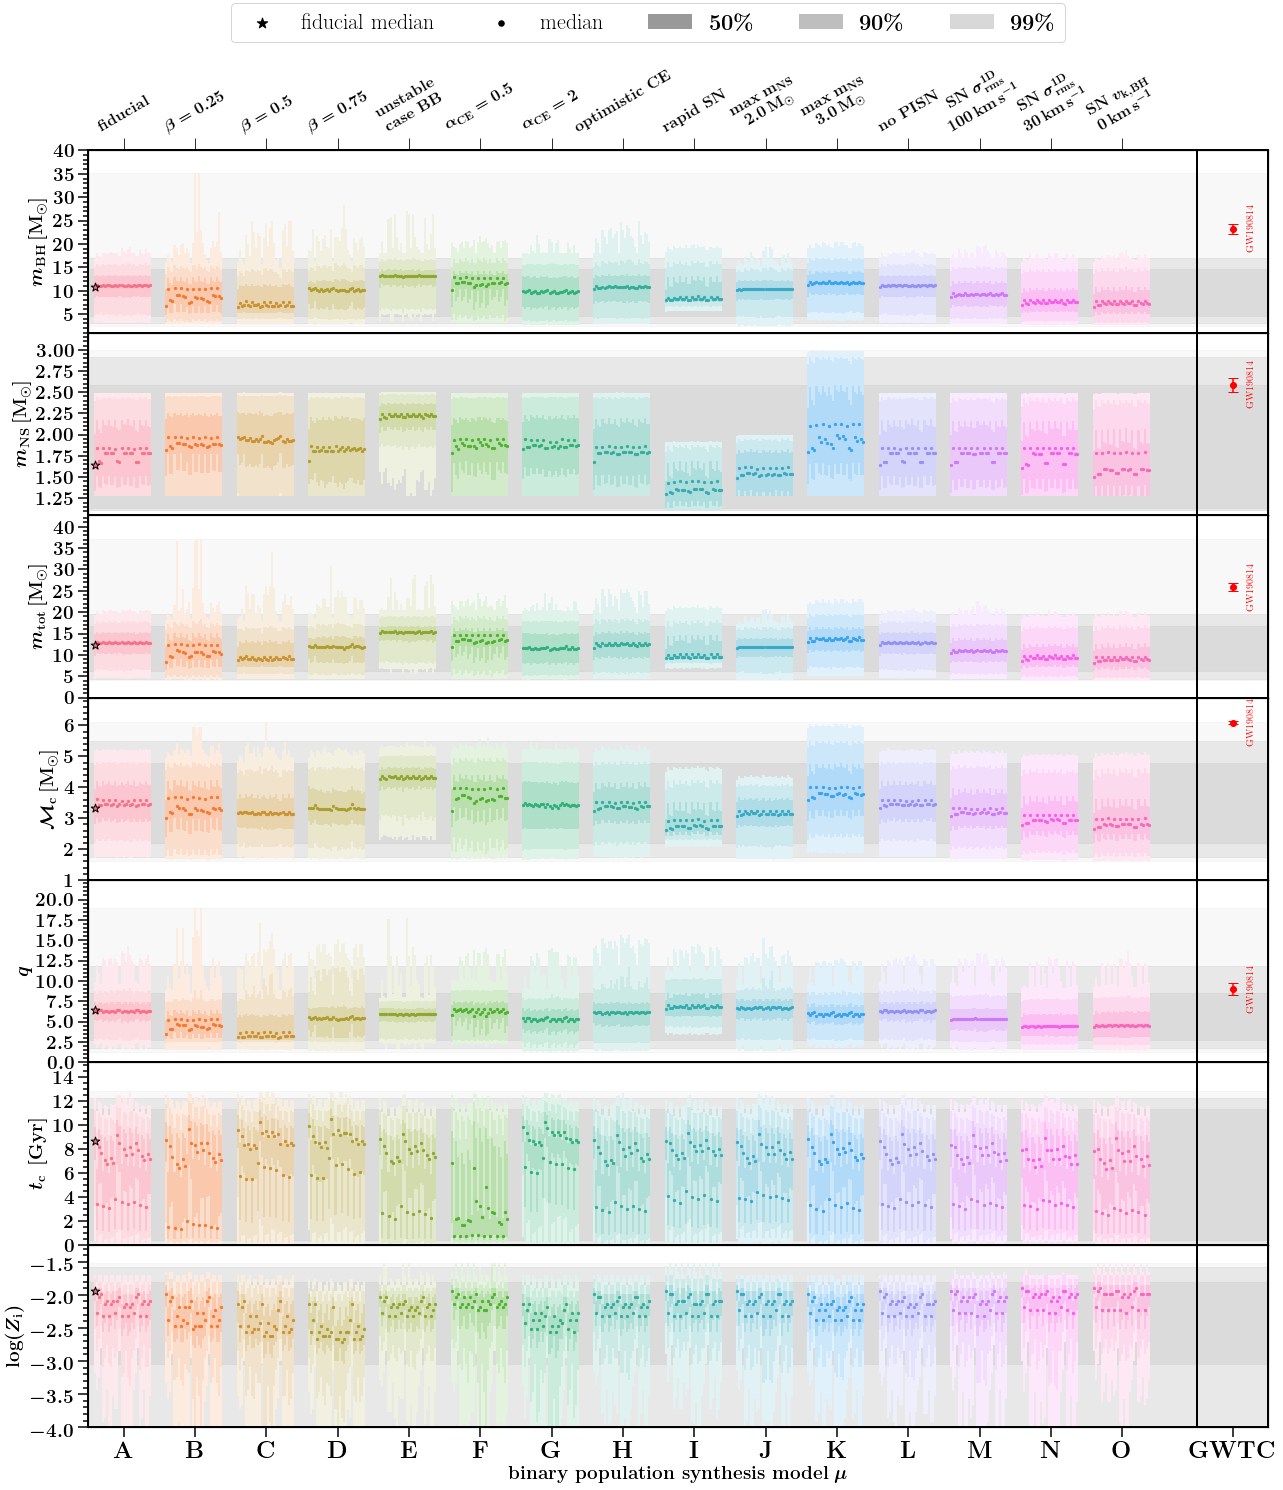

In [28]:
# ['Mass1', 'Mass2', 'tc',\
#                    'log10(tc)', 'TotMass', 'ChirpMass', 'q', Zi]
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')


solar=0.0142
xright = 1+ 0.05 # extra space on the right 
NumberBPSmodels=15
alphabet = list(string.ascii_uppercase)
BPSnameslist = alphabet[:NumberBPSmodels]

DCOtype='BHNS'
ncols, nrows= 1,7
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,20), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


print('starting distribution quantile plot')
print('this might take some time since I need to loop through all model variations and plot colorranges - apologies')

xlabel = r'\textbf{binary population synthesis model} $\mu$'

ylabel = r'$m_{\rm{BH}}  \, [\rm{M}_{\odot}]$'
xvarind = 0 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[0],  ylim=[1,40], xlabel=xlabel, ylabel=ylabel)

ylabel = r'$m_{\rm{NS}}   \, [\rm{M}_{\odot}]$'
xvarind = 1 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[1],  ylim=[1.05,3.2], xlabel=xlabel, ylabel=ylabel)


ylabel = r'$m_{\rm{tot}}  \, [\rm{M}_{\odot}]$'
xvarind = 4 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[2],  ylim=[0,42.7], xlabel=xlabel, ylabel=ylabel)
print('halfway')
ylabel = r'$\mathcal{M}_{\rm{c}}  \, [\rm{M}_{\odot}]$'
xvarind = 5 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[3],  ylim=[1,6.9], xlabel=xlabel, ylabel=ylabel)


ylabel = r'$q$'
xvarind = 6 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[4],  ylim=[0.,22.4], xlabel=xlabel, ylabel=ylabel)



ylabel = r' $t_{\rm{c}}$ $ \, [{\rm{Gyr}}]$'
xvarind = 2
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[5],  ylim=[0,15.2], xlabel=xlabel, ylabel=ylabel)


ylabel = r'$\log(Z _{\rm{i}})$'
xvarind = 8 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[6],  ylim=[-4,np.log10(0.057)], xlabel=xlabel, ylabel=ylabel)



for ind_q, interval in enumerate([ 'median', '50percent', '90percent', '99percent']):

    xx_ = [-300, -200]
    yy_ = [-300, -200]

    if interval=='median':
#         if (ind_m==0) & (ind_mssfr==0):
        axe[0].scatter(xx_, yy_, \
                c='k', s=120, label='fiducial median', \
                marker='*', zorder=300, edgecolor='black')                        

        axe[0].scatter(xx_, yy_, \
                    c='k', s=120, label='median', \
                    marker='.', zorder=200)        
    else:


        if interval=='50percent':
            zorder = 110
            yy = yy_
            alpha = 0.4  
            label=r'$50\%$'
        elif interval=='90percent':
            zorder = 105
            yy = yy_
            alpha = 0.25    
            label =r'$90\%$'
        elif interval =='99percent':
            zorder = 102
            yy = yy_
            alpha = 0.15
            label=r'$99\%$'

#         axe.bar(xx_, height=(yy[1]-yy[0]), bottom=yy[0], color='white', alpha=1, \
#                width=dxlen, zorder=zorder-1)
        axe[0].bar(xx_, height=(yy[1]-yy[0]), bottom=yy[0], color='k', alpha=alpha, \
               width=0.5, zorder=zorder, label=label)


handles, labels = axe[0].get_legend_handles_labels()
    
axe[0].set_xlim(-0.5, 15+xright)
lgd = f.legend(handles, labels, fontsize=fs-2, ncol=9,\
                bbox_to_anchor=(.5, 1.04) , loc='upper center') #,  markerscale=2., scatterpoints=1) # loc = 'upper center') #0.56 works 


plt.tight_layout()

f.subplots_adjust(wspace=0, hspace=0.0)

f.savefig('./DistributionQuantileFigures/CDF_BPSandMSSFRvariations_Summary_BHNS_Z.png', bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')#, bbox_inches='tight')#, loc='upper center') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
f.savefig('./DistributionQuantileFigures/CDF_BPSandMSSFRvariations_Summary_BHNS_Z.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')#, bbox_inches='tight')#, loc='upper center')#, bbox_inches='tight', loc='upper center') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
plt.show()








# BHBH quantile figure <a class="anchor" id="BHBH-figure"></a>

starting distribution quantile plot
this might take some time since I need to loop through all model variations and plot colorranges - apologies
fontsize 24
fontsize 24
fontsize 24
halfway
fontsize 24
fontsize 24
fontsize 24
fontsize 24


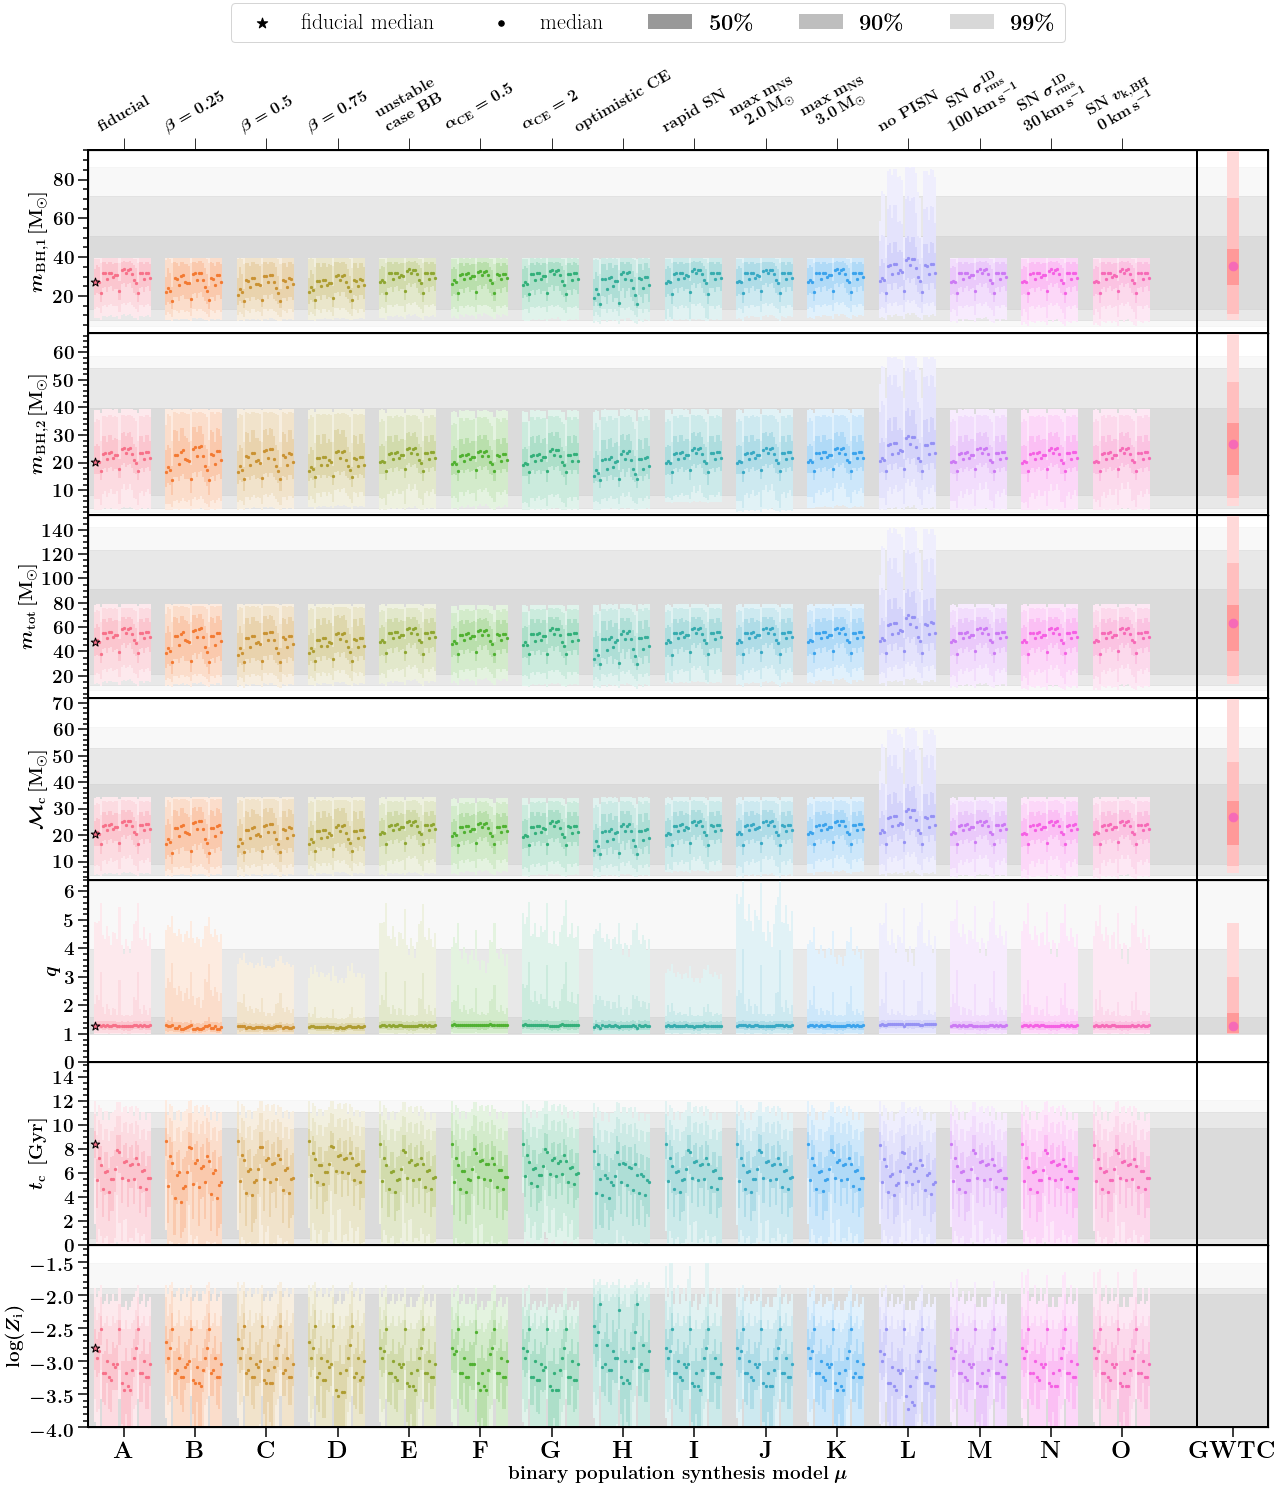

In [30]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# ['Mass1', 'Mass2', 'tc',\
#                    'log10(tc)', 'TotMass', 'ChirpMass', 'q', Zi]
solar=0.0142
xright = 1+ 0.05 # extra space on the right 
NumberBPSmodels=15
alphabet = list(string.ascii_uppercase)
BPSnameslist = alphabet[:NumberBPSmodels]

DCOtype='BHBH'
ncols, nrows= 1,7
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,20), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


print('starting distribution quantile plot')
print('this might take some time since I need to loop through all model variations and plot colorranges - apologies')

xlabel = r'\textbf{binary population synthesis model} $\mu$'

ylabel = r'$m_{\rm{BH,1}}  \, [\rm{M}_{\odot}]$'
xvarind = 0 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[0],  ylim=[1,95], xlabel=xlabel, ylabel=ylabel)

ylabel = r'$m_{\rm{BH,2}}   \, [\rm{M}_{\odot}]$'
xvarind = 1 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[1],  ylim=[1,67], xlabel=xlabel, ylabel=ylabel)


ylabel = r'$m_{\rm{tot}}  \, [\rm{M}_{\odot}]$'
xvarind = 4 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[2],  ylim=[2,152], xlabel=xlabel, ylabel=ylabel)
print('halfway')
ylabel = r'$\mathcal{M}_{\rm{c}}  \, [\rm{M}_{\odot}]$'
xvarind = 5 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[3],  ylim=[3,72], xlabel=xlabel, ylabel=ylabel)


ylabel = r'$q$'
xvarind = 6 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[4],  ylim=[0,6.4], xlabel=xlabel, ylabel=ylabel)





ylabel = r' $t_{\rm{c}}$ $ \, [{\rm{Gyr}}]$'
xvarind = 2
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[5],  ylim=[0,15.2], xlabel=xlabel, ylabel=ylabel)


ylabel = r'$\log(Z _{\rm{i}})$'
xvarind = 8 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[6],  ylim=[-4,np.log10(0.057)], xlabel=xlabel, ylabel=ylabel)



for ind_q, interval in enumerate([ 'median', '50percent', '90percent', '99percent']):

    xx_ = [-300, -200]
    yy_ = [-300, -200]

    if interval=='median':
#         if (ind_m==0) & (ind_mssfr==0):
        axe[0].scatter(xx_, yy_, \
                c='k', s=120, label='fiducial median', \
                marker='*', zorder=300, edgecolor='black')                        

        axe[0].scatter(xx_, yy_, \
                    c='k', s=120, label='median', \
                    marker='.', zorder=200)        
    else:


        if interval=='50percent':
            zorder = 110
            yy = yy_
            alpha = 0.4  
            label=r'$50\%$'
        elif interval=='90percent':
            zorder = 105
            yy = yy_
            alpha = 0.25    
            label =r'$90\%$'
        elif interval =='99percent':
            zorder = 102
            yy = yy_
            alpha = 0.15
            label=r'$99\%$'

#         axe.bar(xx_, height=(yy[1]-yy[0]), bottom=yy[0], color='white', alpha=1, \
#                width=dxlen, zorder=zorder-1)
        axe[0].bar(xx_, height=(yy[1]-yy[0]), bottom=yy[0], color='k', alpha=alpha, \
               width=0.5, zorder=zorder, label=label)


handles, labels = axe[0].get_legend_handles_labels()
    
axe[0].set_xlim(-0.5, 15+xright)
lgd = f.legend(handles, labels, fontsize=fs-2, ncol=9,\
                bbox_to_anchor=(.5, 1.04) , loc='upper center') #,  markerscale=2., scatterpoints=1) # loc = 'upper center') #0.56 works 


plt.tight_layout()

f.subplots_adjust(wspace=0, hspace=0.0)

f.savefig('./DistributionQuantileFigures/CDF_BPSandMSSFRvariations_Summary_'+DCOtype+'_Z.png', bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')#, bbox_inches='tight')#, loc='upper center') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
f.savefig('./DistributionQuantileFigures/CDF_BPSandMSSFRvariations_Summary_'+DCOtype+'_Z.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')#, bbox_inches='tight')#, loc='upper center')#, bbox_inches='tight', loc='upper center') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
plt.show()

# NSNS quantile figure <a class="anchor" id="NSNS-figure"></a>

starting distribution quantile plot
this might take some time since I need to loop through all model variations and plot colorranges - apologies
fontsize 24
1.4670607545826588 1.3735280425674512
2.029829403726529 1.683832655366816
fontsize 24
1.4660131715275369 1.3729990660248792
1.3527059414404503 1.0903503920015083
fontsize 24
2.9330938080612348 2.7468823888957017
3.3874769312551507 3.2788914850683857
halfway
fontsize 24
1.2759810312611222 1.195315389618505
1.4378306484384304 1.4174680328657352
fontsize 24
1.0 1.0
1.4977657056197968 1.0425808334233388
fontsize 24
fontsize 24


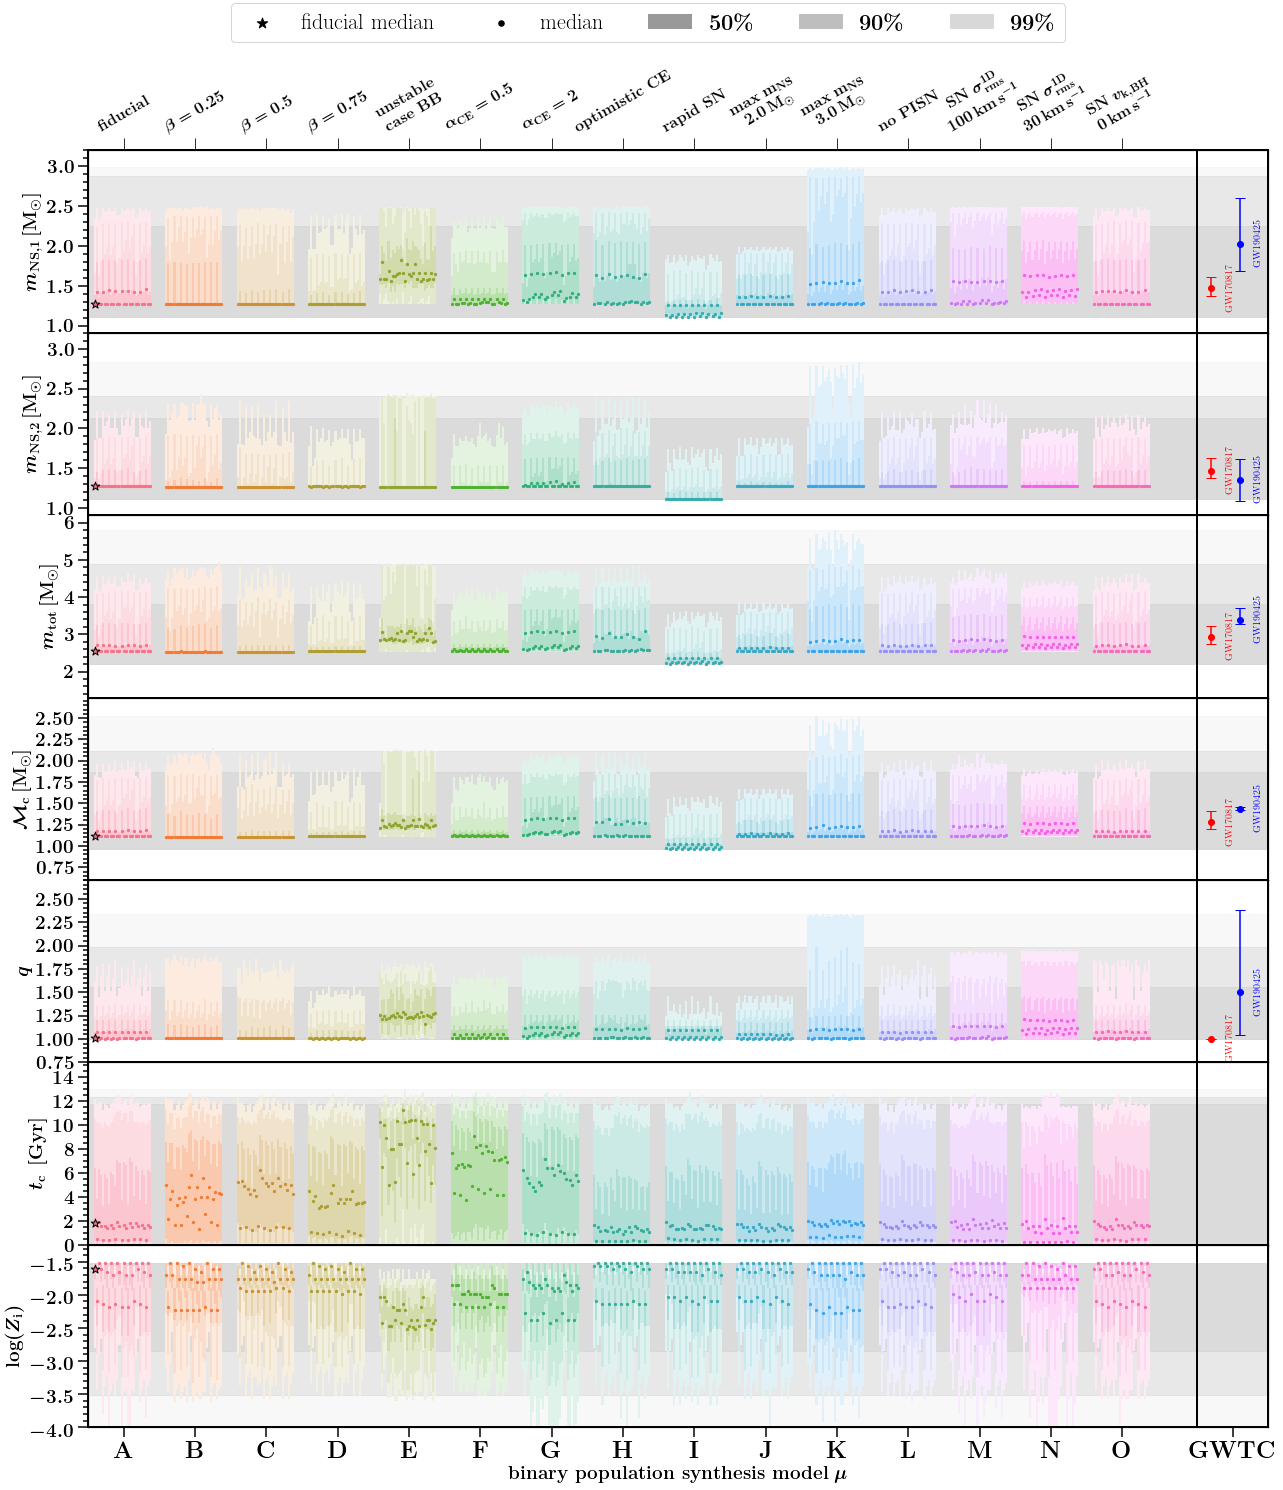

In [32]:
# ['Mass1', 'Mass2', 'tc',\
#                    'log10(tc)', 'TotMass', 'ChirpMass', 'q', Zi]

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
solar=0.0142
xright = 1+0.05 # extra space on the right 
NumberBPSmodels=15
alphabet = list(string.ascii_uppercase)
BPSnameslist = alphabet[:NumberBPSmodels]

DCOtype='NSNS'
ncols, nrows= 1,7
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,20), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


print('starting distribution quantile plot')
print('this might take some time since I need to loop through all model variations and plot colorranges - apologies')

xlabel = r'\textbf{binary population synthesis model} $\mu$'

ylabel = r'$m_{\rm{NS,1}}  \, [\rm{M}_{\odot}]$'
xvarind = 0 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[0],  ylim=[0.91,3.2], xlabel=xlabel, ylabel=ylabel)

ylabel = r'$m_{\rm{NS,2}}   \, [\rm{M}_{\odot}]$'
xvarind = 1 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[1],  ylim=[0.91,3.2], xlabel=xlabel, ylabel=ylabel)


ylabel = r'$m_{\rm{tot}}  \, [\rm{M}_{\odot}]$'
xvarind = 4 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[2],  ylim=[1.3, 6.2], xlabel=xlabel, ylabel=ylabel)
print('halfway')
ylabel = r'$\mathcal{M}_{\rm{c}}  \, [\rm{M}_{\odot}]$'
xvarind = 5 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[3],  ylim=[0.6,2.74], xlabel=xlabel, ylabel=ylabel)


ylabel = r'$q$'
xvarind = 6 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[4],  ylim=[0.75,2.7], xlabel=xlabel, ylabel=ylabel)




 
ylabel = r' $t_{\rm{c}}$ $ \, [{\rm{Gyr}}]$'
xvarind = 2
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[5],  ylim=[0,15.2], xlabel=xlabel, ylabel=ylabel)


ylabel = r'$\log(Z _{\rm{i}})$'
xvarind = 8 # number of xvar in list above 
plotConfidenceIntervals(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarind=xvarind,\
                              axe=axe[6],  ylim=[-4,np.log10(0.057)], xlabel=xlabel, ylabel=ylabel)



for ind_q, interval in enumerate([ 'median', '50percent', '90percent', '99percent']):

    xx_ = [-300, -200]
    yy_ = [-300, -200]

    if interval=='median':
#         if (ind_m==0) & (ind_mssfr==0):
        axe[0].scatter(xx_, yy_, \
                c='k', s=120, label='fiducial median', \
                marker='*', zorder=300, edgecolor='black')                        

        axe[0].scatter(xx_, yy_, \
                    c='k', s=120, label='median', \
                    marker='.', zorder=200)        
    else:


        if interval=='50percent':
            zorder = 110
            yy = yy_
            alpha = 0.4  
            label=r'$50\%$'
        elif interval=='90percent':
            zorder = 105
            yy = yy_
            alpha = 0.25    
            label =r'$90\%$'
        elif interval =='99percent':
            zorder = 102
            yy = yy_
            alpha = 0.15
            label=r'$99\%$'

#         axe.bar(xx_, height=(yy[1]-yy[0]), bottom=yy[0], color='white', alpha=1, \
#                width=dxlen, zorder=zorder-1)
        axe[0].bar(xx_, height=(yy[1]-yy[0]), bottom=yy[0], color='k', alpha=alpha, \
               width=0.5, zorder=zorder, label=label)


handles, labels = axe[0].get_legend_handles_labels()
    
axe[0].set_xlim(-0.5, 15+xright)
lgd = f.legend(handles, labels, fontsize=fs-2, ncol=9,\
                bbox_to_anchor=(.5, 1.04) , loc='upper center') #,  markerscale=2., scatterpoints=1) # loc = 'upper center') #0.56 works 


plt.tight_layout()

f.subplots_adjust(wspace=0, hspace=0.0)

f.savefig('./DistributionQuantileFigures/CDF_BPSandMSSFRvariations_Summary_'+DCOtype+'_Z.png', bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')#, bbox_inches='tight')#, loc='upper center') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
f.savefig('./DistributionQuantileFigures/CDF_BPSandMSSFRvariations_Summary_'+DCOtype+'_Z.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')#, bbox_inches='tight')#, loc='upper center')#, bbox_inches='tight', loc='upper center') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
plt.show()



